# <span style='color:blue'>Facial Recognition Using Concolutional Neural Networks</span>

### Libaries used to peform data visualisation and preprocessing

In [1]:
import os
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from skimage.color import rgb2gray
from keras.utils import np_utils

### Dataset

##### Fer2013 was the data set used to train the neural network, it contains 35,887 images of people displaying seven different facial emotions: anger, disgust, fear, happiness, sadness, surprise and neutral. Each image in the dataset is 48*48 pixels in size and has been labelled by a human 

### The structure


- **Data:**  A **35,887x3** CSV document. Each row of the array stores a **48x48** grayscale image, the emotion and the usage.


- **Labels:**  A list of **35,887** numbers in the range 0-6 representing the emotion corresponding to the row of image

Download the dataset:
https://www.kaggle.com/ashishpatel26/facial-expression-recognitionferchallenge

In [2]:
#load dataset
df = pd.read_csv('fer2013/fer2013/fer2013.csv')

In [3]:
#display data
df.head

<bound method NDFrame.head of        emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 colum

In [4]:
#display the shape of the data - 35,887 entries 3 coloumns
df.shape

(35887, 3)

In [5]:
#find the number of different classes/emotions in the dataset
np.sort(df.emotion.unique())
num_classes = 7

In [6]:
#create a dictionary indicating which number represents which emotion
#this will be used to map the output of the network to the 
emotion_labels = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}

In [7]:
#get a count of each emotion in the dataset - happiness is the most common with disgust being the rarest
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

# Data Visualisation

{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


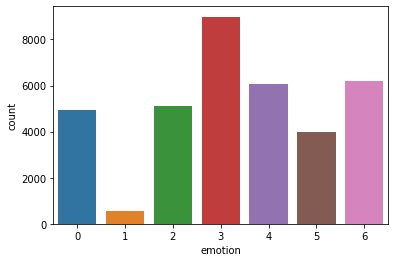

In [8]:
#Most of the dataset is labelled as 'happiness' #3
sns.countplot(df.emotion)
print(emotion_labels)

In [9]:
#select the first row of the pixels column use split to reformat the data into a numpy array
np.array(df.pixels.loc[0].split(' ')).size

2304

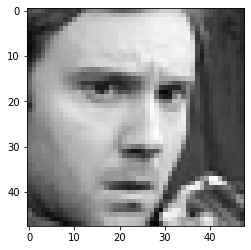

In [10]:
#display the first image in the dataset - create a numpy array with the first 
#size is 2304 so image will be 48*48
image1 = np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype(float)
#display the image of the first row of data
plt.imshow(image1, cmap='gray')

In [11]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

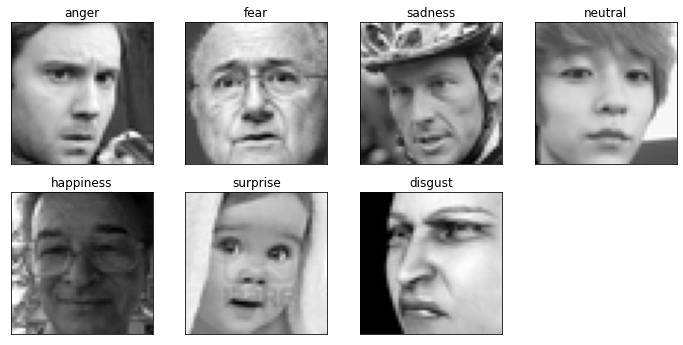

In [12]:
#used to display larger images
figure = plt.figure(figsize=(12,12))

#initiate row = 0 - used to format the displayed images
row = 0
#for each of the unique emotions in the database
for label in df.emotion.unique():
    #store the current row of the pixels column in image
    image = df[df.emotion==label].pixels.iloc[row]
    #split to reformat the data into a numpy array of 48 by 48 total of 2304 pixels
    image = np.array(image.split(' ')).reshape(48, 48).astype('float32')
    #increment the row to create a gap between images
    row += 1
    #format the output images into 4*4 
    ax = plt.subplot(4, 4, row)
    #display the image in grayscale
    ax.imshow(image, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    #add the emotion name to the title of e
    ax.set_title(emotion_labels[label])

# Data Preprocessing

#### In order for the convolutional neural network to be able to make use of the data we are providing it, it needs to be in a suitable format.

In [ ]:
#initialize an images array to hold 
images = []
#for every image in the dataset
for i in range(df.shape[0]):
    #split then data by individual images and store in variable: image
    image = np.array(df['pixels'][i].split(" "))
    #normalize the data between 0 and 1 
    image = [float(i)/255 for i in image]
    #convert image list to numpy array
    image = np.array(image)
    #reshape the numpy array to 48*48 = 2304 pixel in total
    image = image.reshape(48,48)
    images.append(image)


In [ ]:
#convert images array to numpy array
images = np.array(images)
#converting the images to float32 gives accuracy which helps during back propogation
images.astype('float32')    
#store the emotion labels in a numpy array
labels = df.emotion.values
#check the shape
images.shape

In [ ]:
#display image from the numpy array
plt.imshow(images[1], cmap ="gray")

### Split the data into training / testing
80% training and 20% testing was used

In [ ]:
#use train_test_split to split the data into a training set and a testing set
train_x, test_x, train_y, test_y = train_test_split(images, labels, train_size = 0.8)

#convert categories into binary class matrix
train_y = np_utils.to_categorical(train_y, 7)
test_y = np_utils.to_categorical(test_y, 7)

In [ ]:
#add extra "dummy" dimension so that the data is compatible with the keras format
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1)
test_x = test_x.reshape(test_x.shape[0], 48, 48, 1)
#store the input shape that the model will use
input_shape = (48, 48, 1)

In [ ]:
#validate the shape of each segment of the data set
print("Training set(" + str(train_x.shape[0]) + " images): x=%s, y=%s" % (train_x.shape, train_y.shape))
print("Training set(" + str(test_x.shape[0]) + " images): x=%s, y=%s" % (test_x.shape, test_y.shape))

# <span style='color:blue'>Building the model</span>

#### Import keras / tensor flow libaries

In [19]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

#### Check GPU is available

In [20]:
#check if GPU is present
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [21]:
# Create sequential model
model = Sequential()
#feature extraction
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.45))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

#fully connected layer (classification of features)

#flatten the data so it can be fed into the fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.55))
#maps output values to the probability distribution (correct emotion)
model.add(Dense(7, activation='softmax'))
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0

### Compiling The Model

In [22]:
#Adam optimizer used with a learning rate of .007 was tested but was outperformed by RMSprop
#optim = keras.optimizers.Adam(learning_rate=0.007, epsilon=1e-07)

#RMSPprop optimizer was chosen as outpeformed adam
opt_rms = keras.optimizers.RMSprop(lr=0.0004, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

### Data Augmentation

ImageDataGenerator used to augment the data by generating batches of transformed images each epoch. 
The model will be fed the transformed images rather than the regular training data

In [23]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset to prevent negative values
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
    shear_range=0.15, #slightly distort images along axis
    zoom_range=0.15, #agjust zoom
    horizontal_flip=True)  # randomly flip images
     
datagen.fit(train_x)

### Training The Model

In [25]:
#number of epochs
epochs = 5
#size of batch
batch_size = 32
#fit generator used to carry out training and validation
#history stores the information training parameters
history = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size),
                    steps_per_epoch=train_x.shape[0] // batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_x, test_y))

Epoch 1/5
309/897 [=========>....................] - ETA: 16s - loss: 1.9432 - accuracy: 0.2472- 

KeyboardInterrupt: 

### Save the model

In [34]:
model_name='emotions-'+str(epochs)
model.save(model_name+'.hd5') # Keras model
print("Saved Keras model")


INFO:tensorflow:Assets written to: emotions-500.hd5\assets
Saved Keras model


### Load the model
Pretrained weights have been provided (2000 epoch is Adam optimizer acheiving 75% accuracy and 500 epoch is RMSPROP)

In [26]:
model = keras.models.load_model('emotions-500.hd5')

## Plot the accuracy and loss curves
Use of the history variable to provide the data to plot the curves

In [27]:
%matplotlib inline
plt.figure(figsize=[9,7])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.grid(True)

NameError: name 'history' is not defined

<Figure size 648x504 with 0 Axes>

In [28]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.grid(True)

NameError: name 'history' is not defined

<Figure size 576x432 with 0 Axes>

# Face detect

use of mtcnn libary to actually detect faces - this libary will be used to identify faces rather than classify their emotions

In [29]:
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle


#### Load image and create MTCNN detector


In [30]:
#assign image
img = 'people.jpg'
#read image from file into array 
pixels = plt.imread(img)
#create the detector, using default weights
detector = MTCNN()

#### Use WebCam (cv2) to take snapshot

In [ ]:
import cv2

#use spacebar to snapshot web cam and escape key to exit

#initialize web camera
cam = cv2.VideoCapture(0)
#create the window
cv2.namedWindow("WebCam ScreenShot")

##initialize img_counter to 0
img_counter = 0
#capture frames
while True:
    #store output of cam.read() in return_value and frame
    return_value, frame = cam.read()
    #if not return_value
    if not return_value:
        print("WebCam not detected...")
        break
    cv2.imshow("WebCam ScreenShot", frame)
    k = cv2.waitKey(1)
    # if escape key pressed
    if k%256 == 27:  
        print("Closing...")
        break
    # elif space bar pressed
    elif k%256 == 32:
        img_name = "img.jpg".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} has been saved!".format(img_name))
        #close the loop when a snapshot has been taken
        break

cam.release()
#destroy windows when finished
cv2.destroyAllWindows()

## Prediction Functions

In [31]:
#function used to draw the face detection along with the text label of emotion and accuracy
#function in takes in the file, list of located faces, list of emotions and accuracies
def draw_emotions(filename, result_list, emotions, accuracies):
    figure = plt.figure(figsize=(12,12))
    #load the image
    data = plt.imread(filename)
     # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    #keeps track of the current face
    count = 0;
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red', linewidth = 2, label="hello")
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
        #labelling for the detected faces (values passed from predict_emotion function)
        string = str(emotions[count]) + " " + str(accuracies[count])
        #format red text to a more central location
        ax.text(x+15, y-23, string, backgroundcolor="red")
        #increment the count for the next face
        count += 1
    #display the image    
    plt.show()
            

#### Function that predicts the emotion of each face and feeds the information to the draw_emotions function

In [32]:
#function that predicts the emotion takes in an image
def predict_emotion(img):
    
    # detect faces in the image using MTCNN
    located_faces = detector.detect_faces(pixels)
    #notify user number of faces detected by MTCNN in image
    print("A total of " + str(len(located_faces)) + " faces have been detected")
    
    #initalize list to store found emotions and accuracies
    emotions = []
    accuracies = [] 
    
    # for each face detected in the image
    for i in range(len(located_faces)):
        # get coordinates of face
        x1, y1, width, height = located_faces[i]['box']      
        x1 = abs(x1)
        y1 = abs(y1)
        x2, y2 = x1 + width, y1 + height
        
        #resize each face to 48 by 48 store in face_pixels
        face_pixels = resize(pixels[y1:y2, x1:x2], (48,48))
        #convert face to grayscale
        face_pixels = rgb2gray(face_pixels)
           
        #reshape the faces into the correct format to be fed into the neural network
        face_pixels = face_pixels.reshape(-1, 48, 48, 1)
        emotion_predict = model.predict(face_pixels)
        
        #append the found emotion to the found emotions list
        emotions.append(emotion_labels[emotion_predict.argmax()])
        #append the accuracy rounded to 2 DP to the accuracies array
        accuracies.append(round(np.max(emotion_predict), 2))
    
    
    #call draw_emotions functions feeding the data found in predict_emotion to plot the relevant drawings
    draw_emotions(img, located_faces, emotions, accuracies)
    
    #display list of emotions and accuracies found
    print("----------Emotions----------")
    print("------------------------------") 
    print(emotions)
    print("----------Accuracies----------")
    print(accuracies)
    print("------------------------------")  

## Perform a prediction!

A total of 6 faces have been detected


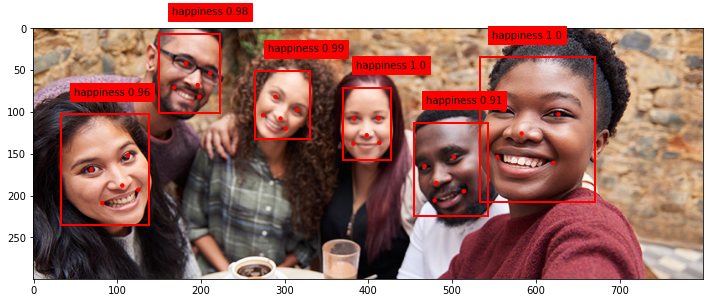

----------Emotions----------
------------------------------
['happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness']
----------Accuracies----------
[1.0, 0.91, 0.96, 0.99, 0.98, 1.0]
------------------------------


In [33]:
#call the predict_emotion function passing the chosen image to process
predict_emotion(img)

### Plot confusion matrix to display results

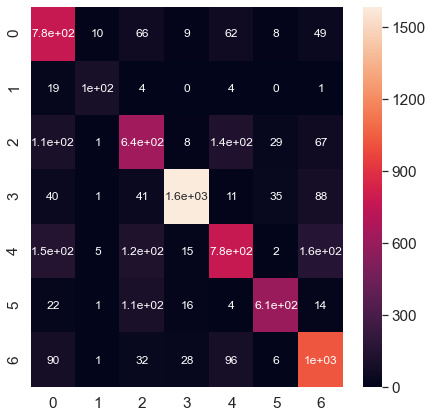

In [34]:
#use sklearn confusion matrix
from sklearn.metrics import confusion_matrix
#store predictions on test data
predictions = model.predict(test_x)

computed_predictions = np.argmax(predictions, axis=1)
rounded_labels=np.argmax(test_y, axis=1)

cm=confusion_matrix(rounded_labels,computed_predictions)
#7 labels
#emotion_labels = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}
df_cm = pd.DataFrame(cm, range(7),
                  range(7))
plt.figure(figsize = (7,7))
sns.set(font_scale=1.4)#for label size
#create a heatmap
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
#display the confusion matrix
plt.show()